<a href="https://colab.research.google.com/github/nichd36/Outpaint-Test/blob/main/OutpaintingControlNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing packages from requirements.txt

In [1]:
!pip install -r requirements.txt

  Cloning https://github.com/huggingface/diffusers (to revision b5fd6f13f5434d69d919cc8cedf0b11db664cf06) to /tmp/pip-install-8ulqo1qx/diffusers_146341c112e445b892f1ff0929c23235
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers /tmp/pip-install-8ulqo1qx/diffusers_146341c112e445b892f1ff0929c23235
  Running command git rev-parse -q --verify 'sha^b5fd6f13f5434d69d919cc8cedf0b11db664cf06'
  Running command git fetch -q https://github.com/huggingface/diffusers b5fd6f13f5434d69d919cc8cedf0b11db664cf06
  Running command git checkout -q b5fd6f13f5434d69d919cc8cedf0b11db664cf06
  Resolved https://github.com/huggingface/diffusers to commit b5fd6f13f5434d69d919cc8cedf0b11db664cf06
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 3

# Importing libraries

In [15]:
import random
import torch
import sympy
from PIL import Image, ImageOps
from diffusers import StableDiffusionXLControlNetPipeline, ControlNetModel

# Setup ControlNet and Pipeline

In [2]:
controlnet = ControlNetModel.from_pretrained(
    "destitech/controlnet-inpaint-dreamer-sdxl", torch_dtype=torch.float16, variant="fp16"
)
pipeline = StableDiffusionXLControlNetPipeline.from_pretrained(
    "RunDiffusion/Juggernaut-XL-v9",
    torch_dtype=torch.float16,
    variant="fp16",
    controlnet=controlnet,
).to("cuda")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.23k [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/2.50G [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/667 [00:00<?, ?B/s]

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/588 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/705 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/496 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/462 [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/856 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.78k [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/607 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

# Putting in prompt

In [55]:
prompt = input("Kindly put in your prompt: ")
negative_prompt = "lowres, error, cropped, worst quality, low quality, jpeg artifacts, out of frame, watermark, signature"

Kindly put in your prompt: a person in a dark environment with night sky background


# Entering image file path

In [39]:
uploaded_image_path = input("Enter the path to your image file (jpg, png, jpeg): ")

Enter the path to your image file (jpg, png, jpeg): person.jpg


# Displaying original image

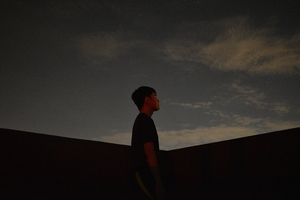

In [40]:
from IPython.display import Image
Image(filename=uploaded_image_path)

# Selecting expansion direction, 100 pixels for each direction

In [41]:
print("Expand to:")
left = input("Expand left? (yes/no): ").strip().lower() == "yes"
right = input("Expand right? (yes/no): ").strip().lower() == "yes"
up = input("Expand up? (yes/no): ").strip().lower() == "yes"
down = input("Expand down? (yes/no): ").strip().lower() == "yes"

Expand to:
Expand left? (yes/no): yes
Expand right? (yes/no): yes
Expand up? (yes/no): yes
Expand down? (yes/no): no


# Exporting the padded image for reference

In [42]:
from PIL import Image, ImageOps

try:
    if uploaded_image_path:
        seed = random.randint(0, 2**32 - 1)

        image = Image.open(uploaded_image_path).convert("RGB")
        border_left = 100 if left else 0
        border_up = 100 if up else 0
        border_right = 100 if right else 0
        border_down = 100 if down else 0

        padded_image = ImageOps.expand(
            image, border=(border_left, border_up, border_right, border_down), fill=(255, 255, 255)
        )

        padded_image_path = "padded_image.jpg"
        padded_image.save(padded_image_path)
    else:
        print("No image uploaded.")
except Exception as e:
    print(f"Error processing image: {e}")

# Exporting expanded photo with outpainting

In [56]:
expanded_image = pipeline(
        prompt=prompt,
        negative_prompt=negative_prompt,
        height=padded_image.height,
        width=padded_image.width,
        guidance_scale=3.5,
        num_inference_steps=70,
        image=padded_image,
        controlnet_conditioning_scale=0.9,
        control_guidance_end=0.9,
    ).images[0]

expanded_image_path = "expanded_image.jpg"
expanded_image.save(expanded_image_path)

  0%|          | 0/70 [00:00<?, ?it/s]

#### Show outpainted image

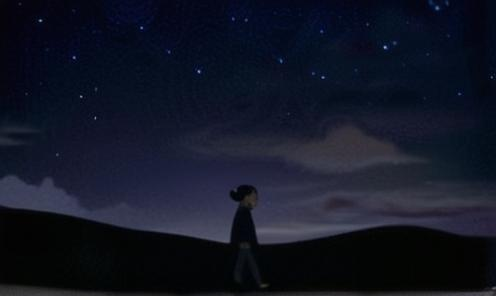

In [57]:
from IPython.display import Image
Image(filename='expanded_image.jpg')